# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [10]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

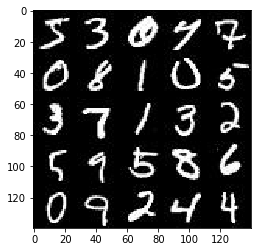

In [11]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

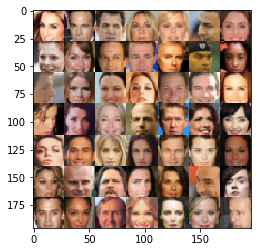

In [12]:
show_n_images = 49

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), \
    'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [14]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image = tf.placeholder(tf.float32,[None,image_width,image_height,image_channels])
    tensor_Z = tf.placeholder(tf.float32,[None,z_dim])
    learn_rate = tf.placeholder(tf.float32)
    return input_image, tensor_Z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [99]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.15
    batchSize,height_i,width_i,deepth_i = images.get_shape().as_list()
    kernal_size = 5
    stridesNum = 2
    with tf.variable_scope('discriminator',reuse=reuse):
        # Input layer is height_i x width_i x deepth_i
        Layer1 = tf.layers.conv2d(images, 64, kernal_size, strides=stridesNum, padding='same')
        relu1 = tf.maximum(alpha * Layer1, Layer1)
        # Now height_i-kernal_size x width_i/2 x 64
        #print(relu1.shape)
        
        Layer2 = tf.layers.conv2d(relu1, 128, kernal_size, strides=stridesNum, padding='same')
        bn2 = tf.layers.batch_normalization(Layer2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # height_i/4 x width_i/4 x 128
        #print(relu2.shape)
        
        Layer3 = tf.layers.conv2d(relu2, 256, kernal_size, strides=stridesNum, padding='same')
        bn3 = tf.layers.batch_normalization(Layer3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # height_i/8 x width_i/8 x 256
        #print(relu3.shape)

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        #print(logits.shape)
        outputs = tf.sigmoid(logits)
    return outputs, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [100]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        kernal_size = 5
        strideNum = 2
        alpha=0.1
        # First fully connected layer
        gLayer1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        gLayer1 = tf.reshape(gLayer1, (-1,7,7, 256))
        gLayer1 = tf.layers.batch_normalization(gLayer1, training=is_train)
        gLayer1 = tf.maximum(alpha * gLayer1, gLayer1)
        # 5x5x256 now
        #print(gLayer1.shape)        
        gLayer2 = tf.layers.conv2d_transpose(gLayer1, 128, kernal_size, strides=strideNum, padding='same')
        gLayer2 = tf.layers.batch_normalization(gLayer2, training=is_train)
        gLayer2 = tf.maximum(alpha * gLayer2, gLayer2)
        # 14x14x128 now
        #print(gLayer2.shape)        
        gLayer3 = tf.layers.conv2d_transpose(gLayer2, 64, kernal_size, strides=strideNum, padding='same')
        gLayer3 = tf.layers.batch_normalization(gLayer3, training=is_train)
        gLayer3 = tf.maximum(alpha * gLayer3, gLayer3)
        # 14x14x128 now
        #print(gLayer3.shape)        
        # Output layer
        g_logits = tf.layers.conv2d_transpose(gLayer3, out_channel_dim, kernal_size, strides=1, padding='same')
        # 28x28 x out_channel_dim now
        #print(g_logits.shape)        
        g_outputs = tf.tanh(g_logits)
    return g_outputs


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [101]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [102]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [103]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [106]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    step_count = 0
    
    batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
    input_real, input_z,l_rate = model_inputs(data_shape[2],data_shape[1],data_shape[3], z_dim)
    d_loss,g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt,g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            batch_cnt = 0
            for batch_images in get_batches(batch_size):
                batch_images = batch_images*2
                step_count += 1
                batch_cnt += 1
                # TODO: Train Model
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,l_rate:learning_rate })
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,l_rate:learning_rate })
                
                if step_count % 20 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Batch {}/{}...".format(batch_cnt,data_shape[0]/batch_images.shape[0]),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if step_count % 200 == 0:
                    show_generator_output(sess,25,input_z,data_shape[3],data_image_mode)
        show_generator_output(sess,25,input_z,data_shape[3],data_image_mode)                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 20/468.75... Discriminator Loss: 1.5617... Generator Loss: 3.7795
Epoch 1/2... Batch 40/468.75... Discriminator Loss: 0.6824... Generator Loss: 3.1410
Epoch 1/2... Batch 60/468.75... Discriminator Loss: 1.1777... Generator Loss: 6.5586
Epoch 1/2... Batch 80/468.75... Discriminator Loss: 0.2073... Generator Loss: 2.6735
Epoch 1/2... Batch 100/468.75... Discriminator Loss: 0.2880... Generator Loss: 2.3287
Epoch 1/2... Batch 120/468.75... Discriminator Loss: 0.2333... Generator Loss: 2.4729
Epoch 1/2... Batch 140/468.75... Discriminator Loss: 0.1640... Generator Loss: 2.5771
Epoch 1/2... Batch 160/468.75... Discriminator Loss: 0.9938... Generator Loss: 0.8617
Epoch 1/2... Batch 180/468.75... Discriminator Loss: 0.4514... Generator Loss: 2.8796
Epoch 1/2... Batch 200/468.75... Discriminator Loss: 0.4350... Generator Loss: 2.0286


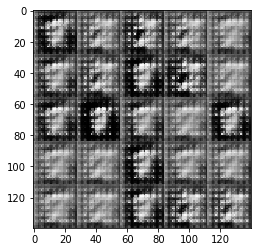

Epoch 1/2... Batch 220/468.75... Discriminator Loss: 0.2503... Generator Loss: 2.5527
Epoch 1/2... Batch 240/468.75... Discriminator Loss: 0.3899... Generator Loss: 6.4794
Epoch 1/2... Batch 260/468.75... Discriminator Loss: 1.0915... Generator Loss: 0.7431
Epoch 1/2... Batch 280/468.75... Discriminator Loss: 0.4503... Generator Loss: 1.4588
Epoch 1/2... Batch 300/468.75... Discriminator Loss: 0.1531... Generator Loss: 3.2909
Epoch 1/2... Batch 320/468.75... Discriminator Loss: 0.2954... Generator Loss: 3.2100
Epoch 1/2... Batch 340/468.75... Discriminator Loss: 0.3372... Generator Loss: 2.3065
Epoch 1/2... Batch 360/468.75... Discriminator Loss: 0.2116... Generator Loss: 2.4604
Epoch 1/2... Batch 380/468.75... Discriminator Loss: 0.5144... Generator Loss: 5.0634
Epoch 1/2... Batch 400/468.75... Discriminator Loss: 0.7061... Generator Loss: 3.1847


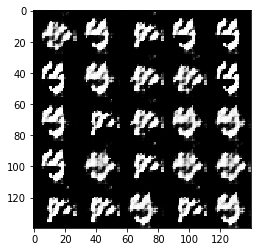

Epoch 1/2... Batch 420/468.75... Discriminator Loss: 0.2018... Generator Loss: 4.2069
Epoch 1/2... Batch 440/468.75... Discriminator Loss: 0.1195... Generator Loss: 2.7185
Epoch 1/2... Batch 460/468.75... Discriminator Loss: 0.2083... Generator Loss: 2.8532
Epoch 2/2... Batch 12/468.75... Discriminator Loss: 0.2076... Generator Loss: 2.4245
Epoch 2/2... Batch 32/468.75... Discriminator Loss: 0.1489... Generator Loss: 2.9122
Epoch 2/2... Batch 52/468.75... Discriminator Loss: 0.3303... Generator Loss: 1.7911
Epoch 2/2... Batch 72/468.75... Discriminator Loss: 0.2278... Generator Loss: 2.8568
Epoch 2/2... Batch 92/468.75... Discriminator Loss: 0.3738... Generator Loss: 1.9600
Epoch 2/2... Batch 112/468.75... Discriminator Loss: 0.3708... Generator Loss: 1.8333
Epoch 2/2... Batch 132/468.75... Discriminator Loss: 0.2422... Generator Loss: 2.1250


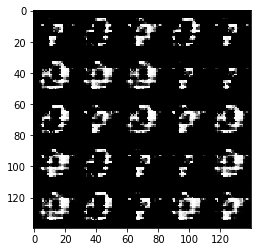

Epoch 2/2... Batch 152/468.75... Discriminator Loss: 0.6257... Generator Loss: 1.2074
Epoch 2/2... Batch 172/468.75... Discriminator Loss: 0.3679... Generator Loss: 1.9354
Epoch 2/2... Batch 192/468.75... Discriminator Loss: 0.5280... Generator Loss: 3.2140
Epoch 2/2... Batch 212/468.75... Discriminator Loss: 0.3681... Generator Loss: 3.2736
Epoch 2/2... Batch 232/468.75... Discriminator Loss: 0.1908... Generator Loss: 3.0015
Epoch 2/2... Batch 252/468.75... Discriminator Loss: 0.2119... Generator Loss: 2.8536
Epoch 2/2... Batch 272/468.75... Discriminator Loss: 1.0284... Generator Loss: 2.0093
Epoch 2/2... Batch 292/468.75... Discriminator Loss: 0.4056... Generator Loss: 3.0880
Epoch 2/2... Batch 312/468.75... Discriminator Loss: 0.2793... Generator Loss: 2.2316
Epoch 2/2... Batch 332/468.75... Discriminator Loss: 0.3440... Generator Loss: 1.5903


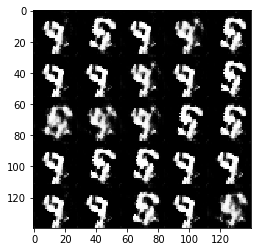

Epoch 2/2... Batch 352/468.75... Discriminator Loss: 0.5710... Generator Loss: 1.9280
Epoch 2/2... Batch 372/468.75... Discriminator Loss: 0.2568... Generator Loss: 2.3396
Epoch 2/2... Batch 392/468.75... Discriminator Loss: 0.3691... Generator Loss: 3.9324
Epoch 2/2... Batch 412/468.75... Discriminator Loss: 0.2385... Generator Loss: 2.8232
Epoch 2/2... Batch 432/468.75... Discriminator Loss: 0.0402... Generator Loss: 4.7422
Epoch 2/2... Batch 452/468.75... Discriminator Loss: 0.2255... Generator Loss: 5.0755


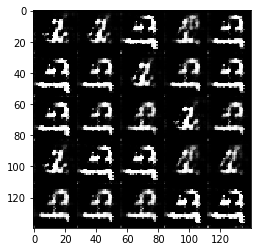

In [107]:
batch_size = 128
z_dim = 1
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 20/1582.8046875... Discriminator Loss: 1.6243... Generator Loss: 0.3674
Epoch 1/1... Batch 40/1582.8046875... Discriminator Loss: 0.7671... Generator Loss: 1.1416
Epoch 1/1... Batch 60/1582.8046875... Discriminator Loss: 0.9669... Generator Loss: 0.6993
Epoch 1/1... Batch 80/1582.8046875... Discriminator Loss: 1.2165... Generator Loss: 0.8054
Epoch 1/1... Batch 100/1582.8046875... Discriminator Loss: 1.4035... Generator Loss: 0.7837
Epoch 1/1... Batch 120/1582.8046875... Discriminator Loss: 1.5721... Generator Loss: 0.5966
Epoch 1/1... Batch 140/1582.8046875... Discriminator Loss: 1.2668... Generator Loss: 0.8067
Epoch 1/1... Batch 160/1582.8046875... Discriminator Loss: 0.9878... Generator Loss: 0.9400
Epoch 1/1... Batch 180/1582.8046875... Discriminator Loss: 1.3332... Generator Loss: 0.8708
Epoch 1/1... Batch 200/1582.8046875... Discriminator Loss: 1.2250... Generator Loss: 0.6532


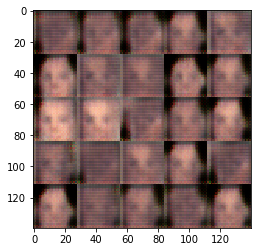

Epoch 1/1... Batch 220/1582.8046875... Discriminator Loss: 0.9891... Generator Loss: 0.6784
Epoch 1/1... Batch 240/1582.8046875... Discriminator Loss: 1.1234... Generator Loss: 1.1318
Epoch 1/1... Batch 260/1582.8046875... Discriminator Loss: 2.5170... Generator Loss: 4.4199
Epoch 1/1... Batch 280/1582.8046875... Discriminator Loss: 1.3031... Generator Loss: 0.9789
Epoch 1/1... Batch 300/1582.8046875... Discriminator Loss: 1.1380... Generator Loss: 1.1690
Epoch 1/1... Batch 320/1582.8046875... Discriminator Loss: 0.8310... Generator Loss: 1.3061
Epoch 1/1... Batch 340/1582.8046875... Discriminator Loss: 0.8295... Generator Loss: 1.0492
Epoch 1/1... Batch 360/1582.8046875... Discriminator Loss: 1.0514... Generator Loss: 1.1754
Epoch 1/1... Batch 380/1582.8046875... Discriminator Loss: 0.7747... Generator Loss: 1.2372
Epoch 1/1... Batch 400/1582.8046875... Discriminator Loss: 1.3187... Generator Loss: 0.5565


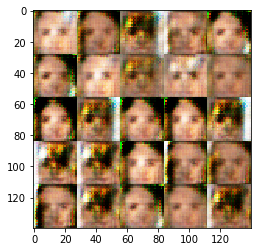

Epoch 1/1... Batch 420/1582.8046875... Discriminator Loss: 1.4246... Generator Loss: 1.0630
Epoch 1/1... Batch 440/1582.8046875... Discriminator Loss: 0.8339... Generator Loss: 1.2738
Epoch 1/1... Batch 460/1582.8046875... Discriminator Loss: 0.8024... Generator Loss: 0.9768
Epoch 1/1... Batch 480/1582.8046875... Discriminator Loss: 1.0308... Generator Loss: 0.8253
Epoch 1/1... Batch 500/1582.8046875... Discriminator Loss: 1.1071... Generator Loss: 0.9889
Epoch 1/1... Batch 520/1582.8046875... Discriminator Loss: 1.1122... Generator Loss: 1.5342
Epoch 1/1... Batch 540/1582.8046875... Discriminator Loss: 1.4944... Generator Loss: 1.4598
Epoch 1/1... Batch 560/1582.8046875... Discriminator Loss: 1.1109... Generator Loss: 1.1118
Epoch 1/1... Batch 580/1582.8046875... Discriminator Loss: 1.4680... Generator Loss: 0.3957
Epoch 1/1... Batch 600/1582.8046875... Discriminator Loss: 1.2574... Generator Loss: 1.0170


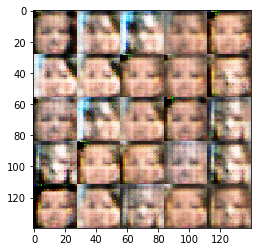

Epoch 1/1... Batch 620/1582.8046875... Discriminator Loss: 0.9293... Generator Loss: 0.7632
Epoch 1/1... Batch 640/1582.8046875... Discriminator Loss: 0.7652... Generator Loss: 1.5447
Epoch 1/1... Batch 660/1582.8046875... Discriminator Loss: 1.4434... Generator Loss: 0.5117
Epoch 1/1... Batch 680/1582.8046875... Discriminator Loss: 1.1098... Generator Loss: 1.1634
Epoch 1/1... Batch 700/1582.8046875... Discriminator Loss: 1.1732... Generator Loss: 1.0848
Epoch 1/1... Batch 720/1582.8046875... Discriminator Loss: 0.9039... Generator Loss: 0.9771
Epoch 1/1... Batch 740/1582.8046875... Discriminator Loss: 1.0918... Generator Loss: 0.8465
Epoch 1/1... Batch 760/1582.8046875... Discriminator Loss: 0.8022... Generator Loss: 1.7115
Epoch 1/1... Batch 780/1582.8046875... Discriminator Loss: 1.0915... Generator Loss: 1.1180
Epoch 1/1... Batch 800/1582.8046875... Discriminator Loss: 1.0412... Generator Loss: 1.1667


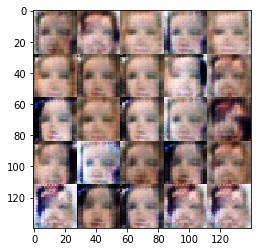

Epoch 1/1... Batch 820/1582.8046875... Discriminator Loss: 1.4964... Generator Loss: 2.3161
Epoch 1/1... Batch 840/1582.8046875... Discriminator Loss: 0.5166... Generator Loss: 1.4443
Epoch 1/1... Batch 860/1582.8046875... Discriminator Loss: 1.2730... Generator Loss: 0.4598
Epoch 1/1... Batch 880/1582.8046875... Discriminator Loss: 1.0286... Generator Loss: 1.4115
Epoch 1/1... Batch 900/1582.8046875... Discriminator Loss: 0.8823... Generator Loss: 0.9127
Epoch 1/1... Batch 920/1582.8046875... Discriminator Loss: 0.8758... Generator Loss: 0.9459
Epoch 1/1... Batch 940/1582.8046875... Discriminator Loss: 0.9285... Generator Loss: 0.9709
Epoch 1/1... Batch 960/1582.8046875... Discriminator Loss: 1.5928... Generator Loss: 0.3937
Epoch 1/1... Batch 980/1582.8046875... Discriminator Loss: 1.3240... Generator Loss: 1.2022
Epoch 1/1... Batch 1000/1582.8046875... Discriminator Loss: 0.9214... Generator Loss: 1.3179


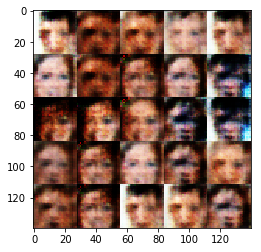

Epoch 1/1... Batch 1020/1582.8046875... Discriminator Loss: 1.5846... Generator Loss: 2.8848
Epoch 1/1... Batch 1040/1582.8046875... Discriminator Loss: 0.9547... Generator Loss: 0.7411
Epoch 1/1... Batch 1060/1582.8046875... Discriminator Loss: 1.3719... Generator Loss: 1.4501
Epoch 1/1... Batch 1080/1582.8046875... Discriminator Loss: 1.0111... Generator Loss: 1.0398
Epoch 1/1... Batch 1100/1582.8046875... Discriminator Loss: 0.5950... Generator Loss: 1.3446
Epoch 1/1... Batch 1120/1582.8046875... Discriminator Loss: 1.1460... Generator Loss: 1.5706
Epoch 1/1... Batch 1140/1582.8046875... Discriminator Loss: 0.8430... Generator Loss: 2.0514
Epoch 1/1... Batch 1160/1582.8046875... Discriminator Loss: 1.5789... Generator Loss: 0.3351
Epoch 1/1... Batch 1180/1582.8046875... Discriminator Loss: 0.9353... Generator Loss: 0.7560
Epoch 1/1... Batch 1200/1582.8046875... Discriminator Loss: 0.9328... Generator Loss: 0.9951


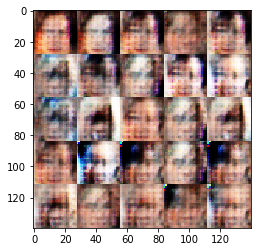

Epoch 1/1... Batch 1220/1582.8046875... Discriminator Loss: 0.9312... Generator Loss: 0.9706
Epoch 1/1... Batch 1240/1582.8046875... Discriminator Loss: 0.8859... Generator Loss: 2.2278
Epoch 1/1... Batch 1260/1582.8046875... Discriminator Loss: 1.2066... Generator Loss: 0.5110
Epoch 1/1... Batch 1280/1582.8046875... Discriminator Loss: 0.8680... Generator Loss: 1.0105
Epoch 1/1... Batch 1300/1582.8046875... Discriminator Loss: 1.1567... Generator Loss: 1.9810
Epoch 1/1... Batch 1320/1582.8046875... Discriminator Loss: 0.9169... Generator Loss: 2.4220
Epoch 1/1... Batch 1340/1582.8046875... Discriminator Loss: 0.6967... Generator Loss: 1.2054
Epoch 1/1... Batch 1360/1582.8046875... Discriminator Loss: 0.5601... Generator Loss: 1.4179
Epoch 1/1... Batch 1380/1582.8046875... Discriminator Loss: 1.5142... Generator Loss: 3.6887
Epoch 1/1... Batch 1400/1582.8046875... Discriminator Loss: 0.8543... Generator Loss: 1.1568


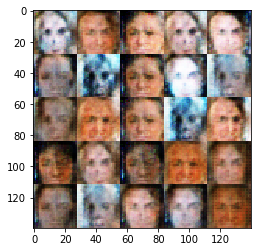

Epoch 1/1... Batch 1420/1582.8046875... Discriminator Loss: 0.6805... Generator Loss: 1.6415
Epoch 1/1... Batch 1440/1582.8046875... Discriminator Loss: 0.7694... Generator Loss: 1.2581
Epoch 1/1... Batch 1460/1582.8046875... Discriminator Loss: 0.7805... Generator Loss: 0.9824
Epoch 1/1... Batch 1480/1582.8046875... Discriminator Loss: 0.6936... Generator Loss: 1.8001
Epoch 1/1... Batch 1500/1582.8046875... Discriminator Loss: 0.8209... Generator Loss: 1.3800
Epoch 1/1... Batch 1520/1582.8046875... Discriminator Loss: 0.9676... Generator Loss: 2.6708
Epoch 1/1... Batch 1540/1582.8046875... Discriminator Loss: 0.8710... Generator Loss: 1.0873
Epoch 1/1... Batch 1560/1582.8046875... Discriminator Loss: 0.9308... Generator Loss: 1.6173
Epoch 1/1... Batch 1580/1582.8046875... Discriminator Loss: 0.9835... Generator Loss: 0.9854


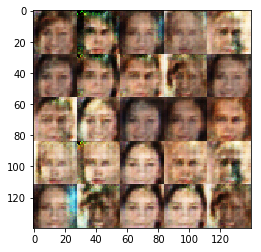

In [108]:
batch_size = 128
z_dim = 3
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.